In [68]:
import numpy as np
import pandas as pd
pd.set_option('max_column', 999)
import regex as re
import requests
from requests.auth import HTTPBasicAuth, HTTPProxyAuth
from bs4 import BeautifulSoup
import mechanize
import zipfile
import time
import os
from urllib.error import HTTPError
from tqdm import tqdm
from itertools import cycle
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, cv, Pool
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
import scikitplot as skplt
files_dir = 'C:\\Users\\razum\\Python\\Houses\\'#'Houses/'

In [3]:
mkd_df = pd.read_csv(files_dir + 'mkd_df.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
mkd_df.sample(5)

,id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,formalname_city,shortname_street,formalname_street,house_number,building,block,letter,address,houseguid,management_organization_id,built_year,exploitation_start_year,project_type,house_type,is_alarm,method_of_forming_overhaul_fund,floor_count_max,floor_count_min,entrance_count,elevators_count,energy_efficiency,quarters_count,living_quarters_count,unliving_quarters_count,area_total,area_residential,area_non_residential,area_common_property,area_land,parking_square,playground,sportsground,other_beautification,foundation_type,floor_type,wall_material,basement_area,chute_type,chute_count,electrical_type,electrical_entries_count,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,file
620623,6674747,5e465691-de23-4c4e-9f46-f35a125b5970,NaN,2abed4d9-5565-4885-bc96-f4ffccc6cba4,648245d0-bd92-4c96-9a33-30e59245b8bf,обл,Орловская,NaN,NaN,г,Орел,пл,Щепная,12,NaN,NaN,NaN,"обл. Орловская, г. Орел, пл. Щепная, д. 12",2487391b-c1ab-4a4b-9dfa-6a8be366143e,8929757.0,1967.0,1967.0,кирпичный,Многоквартирный дом,Нет,На счете регионального оператора,5.0,5.0,2.0,0.0,Не присвоен,38,36.0,2.0,2489.4,1502.1,212.9,774.4,0.0,"0,00",500,500,нет,Иной,Железобетонные,Кирпич,0.0,Отсутствует,0.0,Центральное,1.0,Центральное,Отсутствует,Центральное,Центральное,"0,00",Центральное,Приточно-вытяжная вентиляция,Отсутствует,Наружные водостоки,export-reestrmkd-57-20211001.csv
381629,7717331,18133adf-90c2-438e-88c4-62c41656de70,NaN,b502ae45-897e-4b6f-9776-6ff49740b537,1f69d4d0-8407-4f8d-94cf-8153aec87c5e,обл,Калужская,NaN,NaN,г,Калуга,ул,Максима Горького,7,NaN,NaN,NaN,"обл. Калужская, г. Калуга, ул. Максима Горьког...",52243557-8b8b-4684-a889-b06bf2c05630,7707622.0,1971.0,1971.0,1-447 ( кирпичный ),Многоквартирный дом,Нет,На счете регионального оператора,5.0,0.0,6.0,0.0,Не присвоен,100,100.0,0.0,4507.0,4507.0,0.0,1630.5,1310.0,NaN,500,500,NaN,Ленточный,Железобетонные,Кирпич,1234.5,Отсутствует,0.0,Центральное,2.0,Центральное,Квартирное (квартирный котел),Центральное,Центральное,NaN,Центральное,Вытяжная вентиляция,Отсутствует,Отсутствует,export-reestrmkd-40-20211001.csv
710860,9181308,df594e0e-a935-4664-9d26-0bae13f904fe,NaN,45eea4e7-2977-44bb-9b3d-ef8e9198e5d2,c16fefb1-f4cb-48fa-8e57-7427076d4a4c,обл,Саратовская,NaN,NaN,г,Балаково,ул,Красная Звезда,90,NaN,NaN,NaN,"обл. Саратовская, г. Балаково, ул. Красная Зве...",edf791d6-78b9-4558-b88b-85cb78475a3b,8925334.0,1917.0,1917.0,NaN,Многоквартирный дом,Нет,Не определен,1.0,1.0,1.0,0.0,Не присвоен,3,3.0,0.0,102.4,102.0,0.0,0.4,733.0,"0,00",500,500,NaN,Ленточный,Деревянные,Деревянные,NaN,Отсутствует,0.0,Центральное,1.0,Центральное,Отсутствует,Центральное,Центральное,NaN,Центральное,Приточно-вытяжная вентиляция,Отсутствует,Отсутствует,export-reestrmkd-64-20211001.csv
257846,9096240,83009239-25cb-4561-af8e-7ee111b1cb73,NaN,a101dd8b-3aee-4bda-9c61-9df106f145ff,d133837b-d10d-437b-83fb-4773340e8c80,обл,Астраханская,NaN,NaN,г,Астрахань,ул,Чехова,90,NaN,NaN,"А,а,а1,а2,Ж,ж","обл. Астраханская, г. Астрахань, ул. Чехова, д...",1e9734eb-1277-6853-0032-6dc747609fdb,NaN,NaN,NaN,NaN,Не заполнено,Да,Не заполнено,NaN,NaN,NaN,NaN,Не заполнено,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498,498,NaN,Не заполнено,Не заполнено,Не заполнено,NaN,Не заполнено,NaN,Не заполнено,NaN,Не заполнено,Не заполнено,Не заполнено,Не заполнено,NaN,Не заполнено,Не заполнено,Не заполнено,Не заполнено,export-reestrmkd-30-20211001.csv
520793,8928676,29251dcf-00a1-4e34-98d4-5c47484a36d4,NaN,efc02a6a-273b-4a49-aef9-a5606ef8591c,4d95d3b0-d623-4274-9c3b-88bf12e68bc0,обл,Московская,NaN,NaN,г,Серпухов,ул,Лермонтова,57,NaN,NaN,NaN,"обл. Московская, г. Серпухов, ул. Лермонтова, ...",78a3e821-27b0-4e1f-bb10-84040566d5c6,8354058.0,1982.0,1982.0,панельный,Многоквартирный дом,Нет,На счете регионального оператора,5.0,1.0,6.0,0.0,E,90,90.0,0.0,4568.8,4568.8,0.0,488.4,4460.1,"262,00"

In [5]:
uo_df = pd.concat([pd.read_csv(files_dir + 'export-reestruo-00-20211001.csv', sep = ';')[['id','inn']],
                  pd.read_csv(files_dir + 'inn_id_link.csv')[['id','inn']]])\
.drop_duplicates().reset_index(drop=True)

In [6]:
uo_df.sample(5)

,id,inn
50578,6756250,1658047850
20914,8929829,5050121225
3229,8913053,3329049510
63201,7785500,5034032909
46996,8921204,8606016194


In [7]:
rusprofile_uo_df = pd.read_csv(files_dir + 'rusprofile_uo_df.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
def coop_flg(s):
    x = str(s).upper()
    return int(('ЖИЛИЩ' in x) & ('КООП' in x) | ('ЖСК' in x) 
               | ('ТОВАР' in x) & ('СОБСТВ' in x) | ('ТСЖ' in x) | ('ТСН' in x))

In [9]:
def rusdate(s):
    try:
        t = s.split()
        rep = {'января':'01','февраля':'02','марта':'03','апреля':'04','мая':'05','июня':'06',
              'июля':'07','августа':'08','сентября':'09','октября':'10','ноября':'11','декабря':'12'}
        x = t[0] + '.' + rep[t[1]] + '.' +t[2]
        return datetime.strptime(x,'%d.%m.%Y')
    except:
        return datetime(1990, 1, 1, 0, 0)

In [10]:
rusprofile_uo_df['regdate'] = rusprofile_uo_df['date_reg'].apply(rusdate)
rusprofile_uo_df['coop_flg'] = rusprofile_uo_df['company_name'].apply(coop_flg)

In [11]:
rusprofile_uo_df.sample(5)

,rusprofile_id,company_name,inn,ogrn,date_reg,address,url,id,regdate,coop_flg
24577,2062082,"ТСЖ ""На Пятницкого 46""",3666139547,1063600018371,19 декабря 2006 г.,"394036, Воронежская область, город Воронеж, ул...",NaN,NaN,2006-12-19,1
164108,7537662,"ООО ""СФ-НН""",5261098374,1155261002434,24 апреля 2015 г.,"603144, Нижегородская область, город Нижний Но...",https://www.rusprofile.ru/codes/683200/555,NaN,2015-04-24,0
116104,7895349,"ООО ""Форвард""",4513008725,1154501007210,5 октября 2015 г.,"641600, Курганская область, Макушинский р-н, г...",https://www.rusprofile.ru/codes/683200/45,NaN,2015-10-05,0
108001,1234929,"ТСЖ ""Советское""",7425758587,1097425000595,10 сентября 2009 г.,"457670, Челябинская область, город Верхнеураль...",NaN,NaN,2009-09-10,1
122519,7762654,"ДПКСО ""Николаевский Парк""",277904817,1150280045640,29 июля 2015 г.,"450044, Республика Башкортостан, г. Уфа, ул. К...",https://www.rusprofile.ru/codes/683200/111,NaN,2015-07-29,0


In [12]:
uo_df = uo_df.merge(rusprofile_uo_df[['inn','regdate','coop_flg','company_name']], how = 'left', on = 'inn')

In [13]:
uo_df.sample(5)

,id,inn,regdate,coop_flg,company_name
54521,8925713,2315982273,2015-04-14,0.0,"ООО УК ""Коммунальные Системы"""
7075,8940099,7731390817,2017-11-08,0.0,"ООО ""Стейт Сервис"""
56224,8932060,5005061870,2015-12-23,0.0,"ООО ""Компания Плюс"""
42022,8721662,2623015270,2001-03-27,1.0,"ТСЖ ""Клен"""
26336,8113243,5609027375,NaT,NaN,NaN


In [14]:
uo_hist_df = pd.concat([pd.read_csv(files_dir + 'uo_hist_df.csv'), pd.read_csv(files_dir + 'uo_tab_extra_0_177863.csv')])

In [15]:
def to_date(s):
    try:
        s_date = datetime.strptime(s, '%d.%m.%Y')
        if s_date.year in (1,1900):
            return np.datetime64('NaT')
        if s_date.year < 100:
            s_date = s_date.replace(year = s_date.year + 2000)
        if s_date.year // 100 == 2:
            s_date = s_date.replace(year = s_date.year % 100 + 2000)
        if s_date.year < 1900:
            s_date = s_date.replace(year = s_date.year + 1000)
        if s_date.year >= 3000:
            s_date = s_date.replace(year = s_date.year - 1000)
        if s_date.year >= 2021:
            return np.datetime64('NaT')
        return s_date
    except:
        return np.datetime64('NaT')

In [16]:
uo_hist_df['date_begin_corr'] = uo_hist_df['date_begin'].apply(lambda s: to_date(s))
uo_hist_df['date_end_corr'] = uo_hist_df['date_end'].apply(lambda s: to_date(s))

## Данные относительно полные с 2014 по 2018

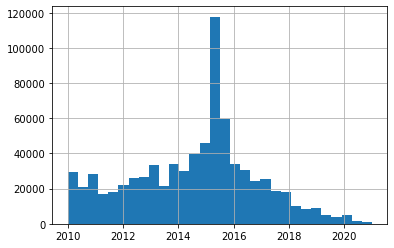

In [17]:
uo_hist_df[uo_hist_df['date_begin_corr'] >= datetime(2010, 1, 1, 0, 0)]['date_begin_corr'].hist(bins = 30);

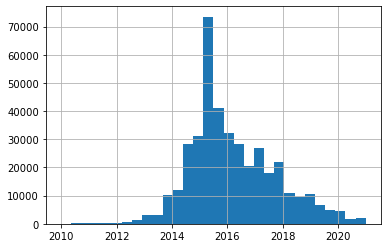

In [18]:
uo_hist_df[uo_hist_df['date_end_corr'] >= datetime(2010, 1, 1, 0, 0)]['date_end_corr'].hist(bins = 30);

## Формирование выборки

In [19]:
def convert_dt(x):
    try:
        return datetime(int(max(int(x),1900)), 1, 1, 0, 0)
    except:
        return datetime(1965, 1, 1, 0, 0)

In [20]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [21]:
mkd_num_feats = ['built_year','floor_count_max','living_quarters_count',
             'area_total','area_residential','area_land']
mkd_cat_feats = ['project_type','formalname_region','foundation_type','floor_type','wall_material',
             'hot_water_type','cold_water_type','sewerage_type','gas_type','ventilation_type']
mkd_feats = mkd_num_feats + mkd_cat_feats

In [217]:
def get_basis(dt, h = 6):
    # Базис и таргет
    beg = uo_hist_df[(uo_hist_df['date_begin_corr'] <= dt) 
                     & (uo_hist_df['date_end_corr'].fillna(datetime(2100, 1, 1, 0, 0)) > dt)]
    dt_end = dt + relativedelta(months = h)
    end = uo_hist_df[(uo_hist_df['date_begin_corr'] <= dt_end) 
                     & (uo_hist_df['date_end_corr'].fillna(datetime(2100, 1, 1, 0, 0)) > dt_end)][['uo_id','house_id']]
    end.columns = ['new_uo_id','new_house_id']
    beg = beg.merge(end, how = 'left', left_on = ['uo_id','house_id'], right_on = ['new_uo_id','new_house_id'])
    beg['response'] = beg['new_house_id'].apply(lambda x: int(x != x))
    beg['report_dt'] = dt
    beg['management_days'] = (beg['report_dt'] - beg['date_begin_corr']).dt.days
    
    # Информация по дому
    beg = beg.merge(mkd_df[['id'] + mkd_feats], 
                    left_on = 'house_id', right_on = 'id')
    beg['built_year_dt'] = beg['built_year'].apply(convert_dt)
    beg['house_age_days'] = (beg['report_dt'] - beg['built_year_dt']).dt.days
    
    # Статистика по портфелю УК
    uo_stat = uo_hist_df.merge(mkd_df[['id']], left_on = 'house_id', right_on = 'id')[['uo_id','date_begin_corr','date_end_corr']]
    uo_stat['date_end_corr'].fillna(datetime(2100, 1, 1, 0, 0), inplace = True)
    uo_stat['uo_active_houses'] = 0
    uo_stat.loc[(uo_stat['date_begin_corr'] <= dt) & (uo_stat['date_end_corr'] > dt), 'uo_active_houses'] = 1
    dt_6 = dt + relativedelta(months = -6)
    dt_12 = dt + relativedelta(months = -12)
    uo_stat['uo_lost_houses_6'] = 0
    uo_stat.loc[(uo_stat['date_end_corr'] >= dt_6) & (uo_stat['date_end_corr'] < dt), 'uo_lost_houses_6'] = 1   
    uo_stat['uo_lost_houses_12'] = 0
    uo_stat.loc[(uo_stat['date_end_corr'] >= dt_12) & (uo_stat['date_end_corr'] < dt), 'uo_lost_houses_12'] = 1
    uo_stat['uo_new_houses_6'] = 0
    uo_stat.loc[(uo_stat['date_begin_corr'] >= dt_6) & (uo_stat['date_begin_corr'] < dt), 'uo_new_houses_6'] = 1   
    uo_stat['uo_new_houses_12'] = 0
    uo_stat.loc[(uo_stat['date_begin_corr'] >= dt_12) & (uo_stat['date_begin_corr'] < dt), 'uo_new_houses_12'] = 1
    uo_stat = uo_stat.groupby('uo_id').agg({'uo_active_houses':'sum', 
                                            'uo_lost_houses_6':'sum', 'uo_lost_houses_12':'sum',
                                            'uo_new_houses_6':'sum', 'uo_new_houses_12':'sum'})
    beg = beg.merge(uo_stat, how = 'left', left_on = 'uo_id', right_index = True)
    beg['uo_lost_houses_6_ratio'] = beg['uo_lost_houses_6'] / beg['uo_active_houses']
    beg['uo_lost_houses_12_ratio'] = beg['uo_lost_houses_12'] / beg['uo_active_houses']
    beg['uo_new_houses_6_ratio'] = beg['uo_new_houses_6'] / beg['uo_active_houses']
    beg['uo_new_houses_12_ratio'] = beg['uo_new_houses_12'] / beg['uo_active_houses']
    
    # Базовая информация по УК
    beg = beg.merge(uo_df[['id','coop_flg','regdate']], how = 'left', left_on = 'uo_id', right_on = 'id')
    beg['regdate'].fillna(datetime(1990, 1, 1, 0, 0),inplace=True)
    #beg['uo_age_months'] = beg['report_dt'].apply(lambda x: 12*x.year + x.month) - beg['regdate'].apply(lambda x: 12*x.year + x.month)
    beg['uo_age'] = (beg['report_dt'] - beg['regdate']).dt.days
    
    for col in mkd_cat_feats:
        beg[col] = beg[col].apply(str)
    return beg

In [218]:
h = 12
r_df = []
for i in tqdm(range(3)):
    r_df.append(get_basis(datetime(2015, 1, 1, 0, 0) + relativedelta(years = i), h))
basis = pd.concat(r_df)
basis.groupby('report_dt')['response'].agg(['count','sum','mean'])

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.50s/it]


,count,sum,mean
report_dt,,,
2015-01-01,596166,101160,0.169684
2016-01-01,681812,60957,0.089404
2017-01-01,690620,51894,0.075141


In [220]:
# Разделим на train и valid на уровне управляющих организаций со стратификацией по размеру портфеля
# Если разбивать портфель управляющей организации, то происходит target leakage через идентификацию управляющей организации
uo_names = basis.groupby(['uo_id','report_dt'])[['uo_active_houses']].count().reset_index()
uo_names['group'] = np.ceil(np.log10(uo_names['uo_active_houses']) + 1)

# Исключаем управляющие организации с большими портфелями, т.к.: 
# характеристики УО по домам не будут различаться, а также происходит переобучение модели на train под них
uo_names = uo_names[uo_names['uo_active_houses'] < 300]
'uo_id',
train_uo, valid_uo = train_test_split(uo_names, test_size = 0.3, stratify = uo_names['group'])
train = basis.merge(train_uo[['uo_id','report_dt']], on = ['uo_id','report_dt'])
valid = basis.merge(valid_uo[['uo_id','report_dt']], on = ['uo_id','report_dt'])
print('Train shape and target rate:', train.shape, train['response'].mean())
print('Valid shape and target rate:', valid.shape, valid['response'].mean())

Train shape and target rate: (1027974, 45) 0.10830915957018368
Valid shape and target rate: (439068, 45) 0.1038016890322228


## Построение модели

In [222]:
features = ['management_days','house_age_days','uo_active_houses',
            'uo_new_houses_6', 'uo_new_houses_6_ratio',
            'uo_new_houses_12', 'uo_new_houses_12_ratio',
            'uo_lost_houses_6', 'uo_lost_houses_6_ratio',
            'uo_lost_houses_12', 'uo_lost_houses_12_ratio',
           'coop_flg','uo_age'] \
+ [x for x in mkd_feats if x not in ['built_year','project_type']]
cat_feats = [x for x in mkd_cat_feats if x not in ['built_year','project_type']]

In [26]:
# features = ['management_days','house_age_days','uo_active_houses',
#             'uo_new_houses_6_ratio','uo_lost_houses_12_ratio',
#            'coop_flg','uo_age'] \
# + [x for x in mkd_feats if x not in ['built_year','project_type']]
# cat_feats = [x for x in mkd_cat_feats if x not in ['built_year','project_type']]

In [223]:
gini = dict()
feats = []
for col in features:
    if col not in cat_feats:
        feats.append(col)
        t = train[['response',col]][~train[col].isnull()]
        gini[col] = np.abs(2*roc_auc_score(t['response'], t[col]) - 1)
gini = pd.Series(gini).sort_values()

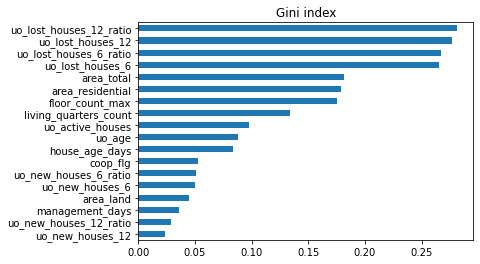

In [224]:
gini.plot(kind = 'barh', title = 'Gini index');

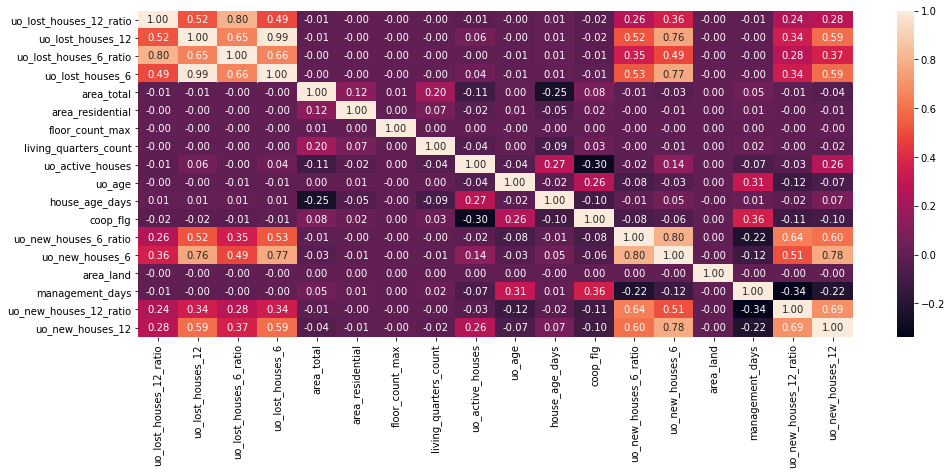

In [225]:
plt.figure(figsize=(16, 6))
sns.heatmap(train[gini.index[::-1]].corr(), annot = True, fmt='.2f');

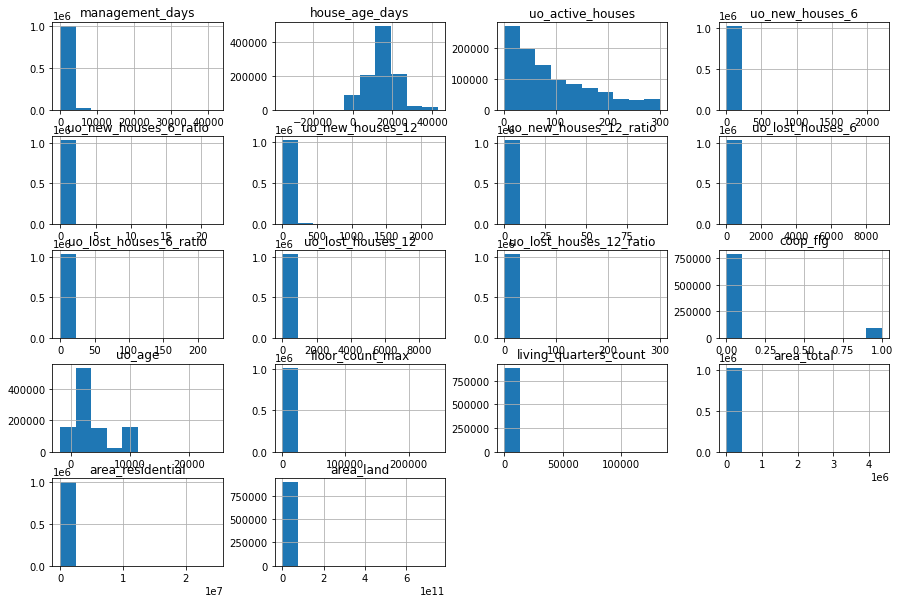

In [226]:
train[features].hist(figsize = (15,10));

In [31]:
#train, valid = train_test_split(basis, test_size = 0.3, stratify = basis['response'])

In [227]:
# Используем деревья малой глубины для сокращения переобучения
cur_time = time()
model_cb = CatBoostClassifier(iterations = 200, verbose = False, depth = 2, cat_features = cat_feats,
                              min_child_samples = 10000, od_pval = 0.05)
model_cb.fit(train[features], train['response'], 
          eval_set = (valid[features], valid['response']),
          use_best_model = True)
print('Time elapsed:', time() - cur_time)
print('Best iteration:', model_cb.best_iteration_)

Time elapsed: 56.532695293426514
Best iteration: 59


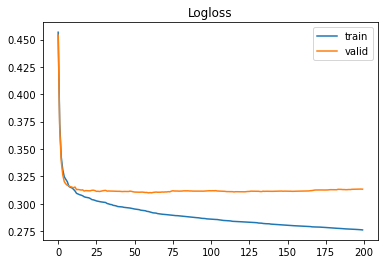

In [228]:
ax = plt.axes()
plt.plot(model_cb.evals_result_['learn']['Logloss'], label = 'train')
plt.plot(model_cb.evals_result_['validation']['Logloss'], label = 'valid')
plt.title('Logloss')
ax.legend();

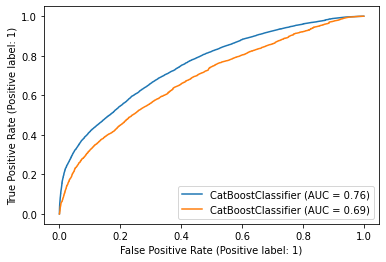

In [229]:
plot_roc_curve(model_cb, train[features], train['response'])
plot_roc_curve(model_cb, valid[features], valid['response'], ax = plt.gca());

In [230]:
# При сокращении списка фичей на основе корреляций переобучение сокращается и модель становится более интерпретируемой
cur_time = time()
feats = ['uo_lost_houses_12_ratio','uo_age','coop_flg',
         'house_age_days','area_total','living_quarters_count','floor_count_max'
         ]
model_cb = CatBoostClassifier(iterations = 200, verbose = False, depth = 2, #cat_features = ['ventilation_type'],
                              min_child_samples = 10000, od_pval = 0.05)
model_cb.fit(train[feats], train['response'], 
          eval_set = (valid[feats], valid['response']),
          use_best_model = True)
print('Time elapsed:', time() - cur_time)
print('Best iteration:', model_cb.best_iteration_)

Time elapsed: 9.825893878936768
Best iteration: 110


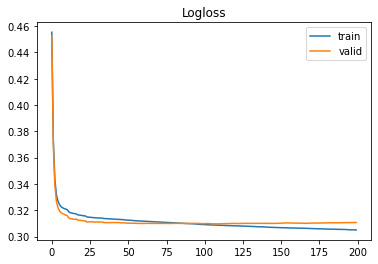

In [231]:
ax = plt.axes()
plt.plot(model_cb.evals_result_['learn']['Logloss'], label = 'train')
plt.plot(model_cb.evals_result_['validation']['Logloss'], label = 'valid')
plt.title('Logloss')
ax.legend();

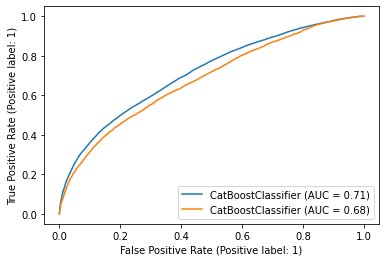

In [232]:
plot_roc_curve(model_cb, train[feats], train['response'])
plot_roc_curve(model_cb, valid[feats], valid['response'], ax = plt.gca());

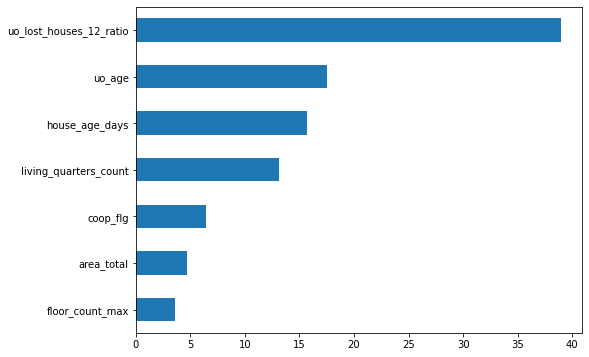

In [235]:
# Основной вклад в прогноз дает статистика по управляющей организации
pd.Series(model_cb.get_feature_importance(), index = feats).sort_values().plot(kind = 'barh', figsize = (8, 6));

In [445]:
# 5-фолдовая кросс-валидация без сохранения портфелей управляющих организаций
cur_time = time()

cv_dataset = Pool(data=basis[features],
                  label=basis['response'],
                  cat_features=cat_feats)

params = {"iterations": 200,
          "depth": 2,
          "loss_function": "Logloss",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=5, 
            plot="True")

print('Time elapsed:', time() - cur_time)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.304295095
bestIteration = 199

Training on fold [1/5]

bestTest = 0.3032892752
bestIteration = 199

Training on fold [2/5]

bestTest = 0.3036973959
bestIteration = 199

Training on fold [3/5]

bestTest = 0.3047306111
bestIteration = 199

Training on fold [4/5]

bestTest = 0.3034611177
bestIteration = 199

Time elapsed: 366.5338921546936


## LightAutoML

In [236]:
automl = TabularAutoML(
    task = Task(
        name = 'binary',
        metric = lambda y_true, y_pred: roc_auc_score(y_true, y_pred))
)
oof_pred = automl.fit_predict(
    train[['response'] + features],
    valid_data = valid[['response'] + features],
    roles = {'target': 'response'},
    verbose = 2
)

[23:12:23] Stdout logging level is INFO2.
[23:12:23] Task: binary

[23:12:23] Start automl preset with listed constraints:
[23:12:23] - time: 3600.00 seconds
[23:12:23] - CPU: 4 cores
[23:12:23] - memory: 16 GB

[23:12:23] Train data shape: (1027974, 28)

[23:12:28] Layer 1 train process start. Time left 3594.82 secs
[23:13:30] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[23:13:30] Time left 3532.88 secs

[23:14:11] Selector_LightGBM fitting and predicting completed
[23:15:33] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[23:15:33] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
[23:20:58] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
[23:20:58] The set of hyperparameters {'feature_fraction': 0.5290418060840998, 'num_leaves': 223, 'bagging_fraction': 0.8005575058716043, 'min_sum_hessian_in_leaf': 0.679657809075816, 'reg_alpha': 1.5320059381854043e-08, 'reg_lambda': 5.

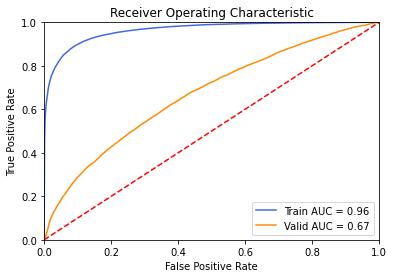

In [238]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(train['response'], automl.predict(train[features]).data)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', color = 'royalblue', label = 'Train AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


fpr, tpr, threshold = metrics.roc_curve(valid['response'], automl.predict(valid[features]).data)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', color = 'darkorange', label = 'Valid AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [240]:
automl_short = TabularAutoML(
    task = Task(
        name = 'binary',
        metric = lambda y_true, y_pred: roc_auc_score(y_true, y_pred))
)
oof_pred = automl_short.fit_predict(
    train[['response'] + feats],
    valid_data = valid[['response'] + feats],
    roles = {'target': 'response'},
    verbose = 2
)

[23:34:37] Stdout logging level is INFO2.
[23:34:37] Task: binary

[23:34:37] Start automl preset with listed constraints:
[23:34:37] - time: 3600.00 seconds
[23:34:37] - CPU: 4 cores
[23:34:37] - memory: 16 GB

[23:34:37] Train data shape: (1027974, 8)

[23:34:38] Layer 1 train process start. Time left 3598.98 secs
[23:35:01] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[23:35:01] Time left 3576.07 secs

[23:35:23] Selector_LightGBM fitting and predicting completed
[23:36:04] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[23:36:04] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
[23:41:21] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
[23:41:21] The set of hyperparameters {'feature_fraction': 0.5075634079566923, 'num_leaves': 165, 'bagging_fraction': 0.6795146156302498, 'min_sum_hessian_in_leaf': 0.026738277166992216, 'reg_alpha': 0.0015258645761591619, 'reg_lambda': 0

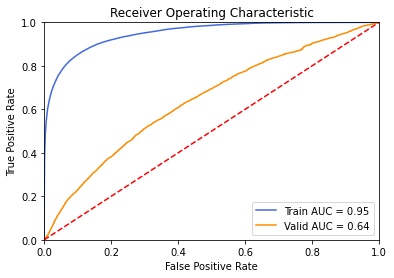

In [241]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(train['response'], automl_short.predict(train[features]).data)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', color = 'royalblue', label = 'Train AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


fpr, tpr, threshold = metrics.roc_curve(valid['response'], automl_short.predict(valid[features]).data)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', color = 'darkorange', label = 'Valid AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()